# Counterfeit detection

The task in this assignment is to detect the  counterfeit banknotes. The data set is based on [banknote authentication Data Set ](https://archive.ics.uci.edu/ml/datasets/banknote+authentication#) from UCI Machine Learning repository. The first three columns denote different parameters obtained from the photographs of the banknotes and last colum provides the label. Frankly as the dataset does not have any description I don't know  which labels corresponds to real and which to counterfeited banknotes. let's assume that label one (positive) denotes the clounterfeits. The set  [banknote_authentication.csv](./data/banknote_authentication.csv) can be found in the `data`  directory.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [4]:
import  matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(8,8)

Please insert you  firstname  and name below

In [5]:
# Aleksandra Stępień
# Jakub Chmura

In [6]:
from  sklearn.model_selection import train_test_split
seed = 31287

In [7]:
data = pd.read_csv('data/banknotes_data.csv')

In [8]:
data.head()

,a0,a1,a2,a3,counterfeit
0,-1.1306,1.8458,-1.35750,-1.38060,1
1,-1.1188,3.3357,-1.34550,-1.95730,1
2,2.6719,3.0646,0.37158,0.58619,0
3,-4.1409,3.4619,-0.47841,-3.88790,1
4,1.4507,8.7903,-2.23240,-0.65259,0


In [9]:
data.describe()

,a0,a1,a2,a3,counterfeit
count,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000
mean,0.431116,1.902054,1.426607,-1.220393,0.444254
std,2.845672,5.942260,4.397341,2.101777,0.497096
min,-7.042100,-13.773100,-5.286100,-7.871900,0.000000
25%,-1.770900,-1.916200,-1.664300,-2.466150,0.000000
50%,0.471345,2.408650,0.567365,-0.614450,0.000000
75%,2.816925,6.800675,3.338825,0.394810,1.000000
max,6.824800,12.730200,17.927400,2.449500,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a0           1166 non-null   float64
 1   a1           1166 non-null   float64
 2   a2           1166 non-null   float64
 3   a3           1166 non-null   float64
 4   counterfeit  1166 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 45.7 KB


In [11]:
data_train, data_test = train_test_split(data, test_size=0.2, shuffle=True, stratify=data.loc[:,'counterfeit'], random_state=seed)

In [12]:
data_train

,a0,a1,a2,a3,counterfeit
711,1.94760,-4.773800,8.52700,-1.866800,0
565,1.42760,8.384700,-2.09950,-1.967700,0
912,-4.28590,8.523400,3.13920,-0.916390,0
64,4.92490,0.689060,0.77344,1.209500,0
871,2.19480,1.378100,1.15820,0.857740,0
...,...,...,...,...,...
47,-2.45610,-4.556600,6.45340,-0.056479,1
1161,1.21380,8.798600,-2.16720,-0.741820,0
174,5.87820,5.940900,-2.85440,-0.608630,0
1119,0.17346,7.869500,0.26876,-3.788300,0


In [13]:
lbls_train = data_train['counterfeit']
lbls_test = data_test['counterfeit']

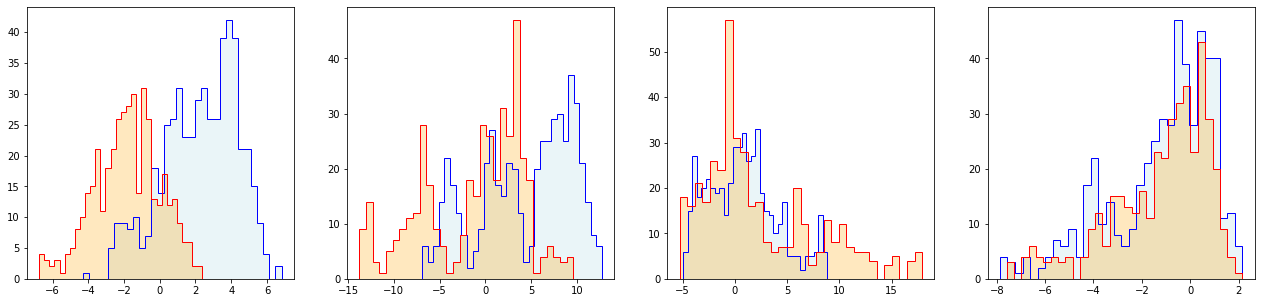

In [14]:
fig, ax = plt.subplots(1,4, figsize=(22,5))
for i in range(4):
    ax[i].hist(data_train[lbls_train==0].iloc[:,i], bins=32, histtype='step', color='blue')
    ax[i].hist(data_train[lbls_train==1].iloc[:,i], bins=32, histtype='step', color='red')
    ax[i].hist(data_train[lbls_train==0].iloc[:,i], bins=32, histtype='bar', color='lightblue', alpha=0.25)
    ax[i].hist(data_train[lbls_train==1].iloc[:,i], bins=32, histtype='bar', color='orange', alpha =0.25)

## Problem 1

Using  the [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) function construct the  Gaussian  Bayes classifier using only one feature. Which feature will you choose? Calculate the confusion matrix (normalized as to show rates), ROC AUC score and plot ROC curve. Do this both for training and validation set. Plot both curves on the same plot.  

Selected feature: We selected **Feature a0** because the histogram showed the clearest separation between the legitimate banknotes and the counterfeit ones

In [39]:
SELECTED_FEATURE = "a0"

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
model_one = GaussianNB()

X_train_one_feature = data_train[[SELECTED_FEATURE]]
X_test_one_feature = data_test[[SELECTED_FEATURE]]

model_one.fit(X_train_one_feature, lbls_train)

GaussianNB()

__Hint__ For calculating metrics and plotting ROC curves you may use functions from scikit-learn: `roc_curve`, `roc_auc_score` and `confusion matrix`. For estimating normal distribution parameters  use `norm.fit` `from scipy.stats`. Use `norm.pdf` for normal probability density function.

In [42]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

Train confusion matrix (normalized)


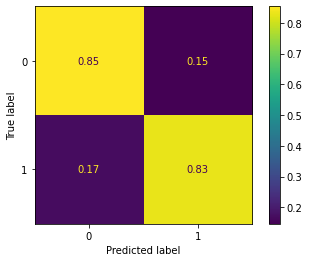

Test confusion matrix (normalized)


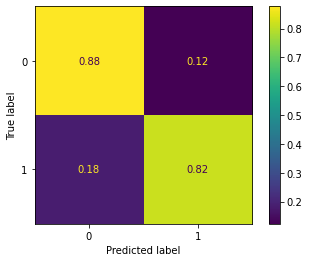

In [46]:
preds_train_one_feature = model_one.predict(X_train_one_feature)
preds_test_one_feature = model_one.predict(X_test_one_feature)

cm_train_one_feature = confusion_matrix(lbls_train, preds_train_one_feature, normalize='true')
cm_test_one_feature = confusion_matrix(lbls_test, preds_test_one_feature, normalize='true')

disp_cm_train_one_feature = ConfusionMatrixDisplay(cm_train_one_feature)
disp_cm_test_one_feature = ConfusionMatrixDisplay(cm_test_one_feature)

print("Train confusion matrix (normalized)")
disp_cm_train_one_feature.plot()
plt.show()

print("Test confusion matrix (normalized)")
disp_cm_test_one_feature.plot()
plt.show()

In [47]:
probs_train_one_feature = model_one.predict_proba(X_train_one_feature)[:,1]
probs_test_one_feature = model_one.predict_proba(X_test_one_feature)[:,1]

In [48]:
auc_train_one_feature = roc_auc_score(lbls_train, probs_train_one_feature)
auc_test_one_feature = roc_auc_score(lbls_test, probs_test_one_feature)

print(f"Train ROC AUC: {auc_train_one_feature:.2f}")
print(f"Test ROC AUC: {auc_test_one_feature:.2f}")

Train ROC AUC: 0.92
Test ROC AUC: 0.94


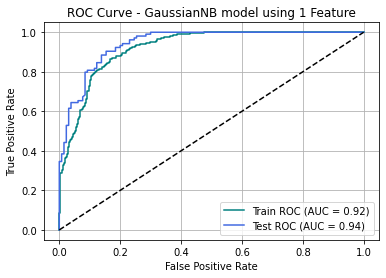

In [49]:
fpr_train_one_feature, tpr_train_one_feature, _ = roc_curve(lbls_train, probs_train_one_feature)
fpr_test_one_feature, tpr_test_one_feature, _ = roc_curve(lbls_test, probs_test_one_feature)

plt.plot(fpr_train_one_feature, tpr_train_one_feature, label=f'Train ROC (AUC = {auc_train_one_feature:.2f})', color='teal')
plt.plot(fpr_test_one_feature, tpr_test_one_feature, label=f'Test ROC (AUC = {auc_test_one_feature:.2f})', color='royalblue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - GaussianNB model using 1 Feature')
plt.legend()
plt.grid(True)
plt.show()

Which feature did you choose?

In [50]:
#a0 - explanation is above

## Problem 2

Same as Problem 1 but now construct Gaussian Naive Bayes using two features. Additionally  compare ROC curve obtained with this and previous  classifier on the test set. What is the improvement of AUC score on the test set?

In [51]:
SELECTED_FEATURES = ["a0", "a1"]

In [53]:
model_two = GaussianNB()

X_train_two_features = data_train[SELECTED_FEATURES]
X_test_two_features = data_test[SELECTED_FEATURES]

model_two.fit(X_train_two_features, lbls_train)

GaussianNB()

Train confusion matrix (normalized)


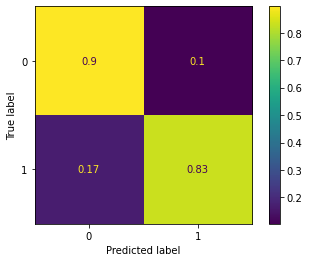

Test confusion matrix (normalized)


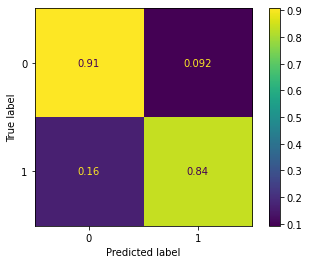

In [54]:
preds_train_two_features = model_two.predict(X_train_two_features)
preds_test_two_features = model_two.predict(X_test_two_features)

cm_train_two_features = confusion_matrix(lbls_train, preds_train_two_features, normalize='true')
cm_test_two_features = confusion_matrix(lbls_test, preds_test_two_features, normalize='true')

disp_cm_train_two_features = ConfusionMatrixDisplay(cm_train_two_features)
disp_cm_test_two_features = ConfusionMatrixDisplay(cm_test_two_features)

print("Train confusion matrix (normalized)")
disp_cm_train_two_features.plot()
plt.show()

print("Test confusion matrix (normalized)")
disp_cm_test_two_features.plot()
plt.show()

In [55]:
probs_train_two_features = model_two.predict_proba(X_train_two_features)[:,1]
probs_test_two_features = model_two.predict_proba(X_test_two_features)[:,1]

In [56]:
auc_train_two_features = roc_auc_score(lbls_train, probs_train_two_features)
auc_test_two_features = roc_auc_score(lbls_test, probs_test_two_features)

print(f"Train ROC AUC: {auc_train_two_features:.2f}")
print(f"Test ROC AUC: {auc_test_two_features:.2f}")

Train ROC AUC: 0.95
Test ROC AUC: 0.96


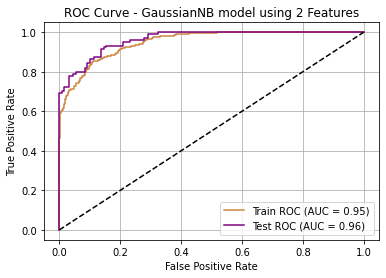

In [57]:
fpr_train_two_features, tpr_train_two_features, _ = roc_curve(lbls_train, probs_train_two_features)
fpr_test_two_features, tpr_test_two_features, _ = roc_curve(lbls_test, probs_test_two_features)

plt.plot(fpr_train_two_features, tpr_train_two_features, label=f'Train ROC (AUC = {auc_train_two_features:.2f})', color='peru')
plt.plot(fpr_test_two_features, tpr_test_two_features, label=f'Test ROC (AUC = {auc_test_two_features:.2f})', color='purple')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - GaussianNB model using 2 Features')
plt.legend()
plt.grid(True)
plt.show()

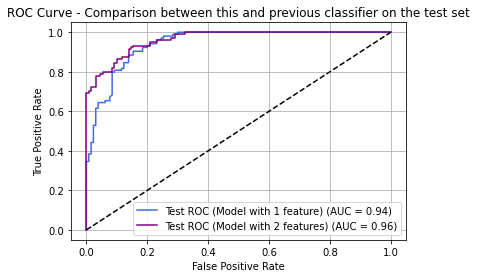

In [58]:
plt.plot(fpr_test_one_feature, tpr_test_one_feature, label=f'Test ROC (Model with 1 feature) (AUC = {auc_test_one_feature:.2f})', color='royalblue')
plt.plot(fpr_test_two_features, tpr_test_two_features, label=f'Test ROC (Model with 2 features) (AUC = {auc_test_two_features:.2f})', color='purple')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Comparison between this and previous classifier on the test set')
plt.legend()
plt.grid(True)
plt.show()

## Problem 3

In [59]:
final_model = GaussianNB()

X_train = data_train
X_test = data_test

final_model.fit(X_train, lbls_train)

GaussianNB()

Test confusion matrix (normalized)


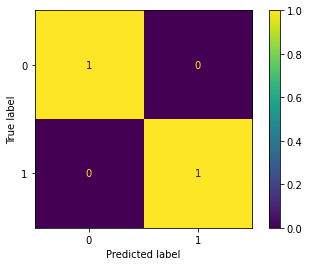

In [60]:
# preds_train = final_model.predict(X_train)
preds_test = final_model.predict(X_test)

cm_test = confusion_matrix(lbls_test, preds_test, normalize='true')

disp_cm_test= ConfusionMatrixDisplay(cm_test)

print("Test confusion matrix (normalized)")
disp_cm_test.plot()
plt.show()

In [61]:
probs_test = final_model.predict_proba(X_test)[:,1]
auc_test = roc_auc_score(lbls_test, probs_test)

fpr_test, tpr_test, _ = roc_curve(lbls_test, probs_test)

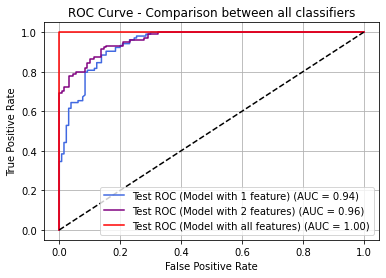

In [63]:
plt.plot(fpr_test_one_feature, tpr_test_one_feature, label=f'Test ROC (Model with 1 feature) (AUC = {auc_test_one_feature:.2f})', color='royalblue')
plt.plot(fpr_test_two_features, tpr_test_two_features, label=f'Test ROC (Model with 2 features) (AUC = {auc_test_two_features:.2f})', color='purple')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (Model with all features) (AUC = {auc_test:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Comparison between all classifiers')
plt.legend()
plt.grid(True)
plt.show()

The ROC curves show that the Gaussian Naive Bayes classifier performs well across all feature sets that were chosen. Using one or two features already yields high AUC scores (0.94 and 0.96), and using all features results in perfect separation on the test set (AUC = 1.00)